## Module 3: Statistical Inference for Linear Regression

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [2]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm


archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`
*   Add the constant term and call it `X_const`

Verify this by returning the shape of `X_const`

In [26]:
# CodeGrade step1

# create copy of data
df = data.copy()

# display dataset info
print(df.info())

# X = MedInc, y = median house value
X = df[['MedInc']]
y = target

print(X.describe())
print(y.describe())

# add constant term
X_const = sm.add_constant(df['MedInc'])

# ensure X and y have consistent dimensions
print(f"X shape: {X.shape}, y shape: {y.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc
count  20640.000000
mean       3.870671
std        1.899822
min        0.499900
25%        2.563400
50%        3.534800
75%        4.743250
max       15.000100
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64
X shape: (20640, 1), y shape: (20640,)


### Step 2

*   fit the OLS model and call it `model`

Then return the rounded model $r^2$ value to four decimal places.

In [14]:
# CodeGrade step2

# fit the regression model
model = sm.OLS(y, X_const).fit()

# calculate r squared value
r_squared = model.rsquared
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.4734


Print the model summary

In [11]:
# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        18:09:28   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

### Step 3

Extract the slope and the related statistics for `MedInc`, calling them, respetively, `slope`, `std_error`, `t_statistic`, and `p_value`.

Return the following (do not round) to verify: `slope, std_error, t_statistic, p_value`.


In [16]:
# CodeGrade step3
slope = model.params['MedInc']
std_error = model.bse['MedInc']
t_statistic = model.tvalues['MedInc']
p_value = model.pvalues['MedInc']

# return slope and stats
slope, std_error, t_statistic, p_value


(np.float64(0.4179384920189623),
 np.float64(0.003068057538867836),
 np.float64(136.22250779989886),
 np.float64(0.0))

### Step 4

Calculuate the confidence interval of `MedInc` at a 95% level of confidence, and call this `conf_int`.

Return the confidence interval rounded to four decimals places.

In [21]:
# CodeGrade step4

# calc confidence interval of medinc at 95% level of confidence
conf_int = round(model.conf_int(alpha=0.05).loc['MedInc'], 4)
conf_int

,MedInc
0,0.4119
1,0.4240


### Step 5

Find the model predictions, call them `y_pred`.

Return `y_pred.shape` to verify.

In [22]:
# CodeGrade step5
# find model predictions
y_pred = model.predict(X_const)
y_pred.shape

(20640,)

Plot the scatterplot with the regression line.

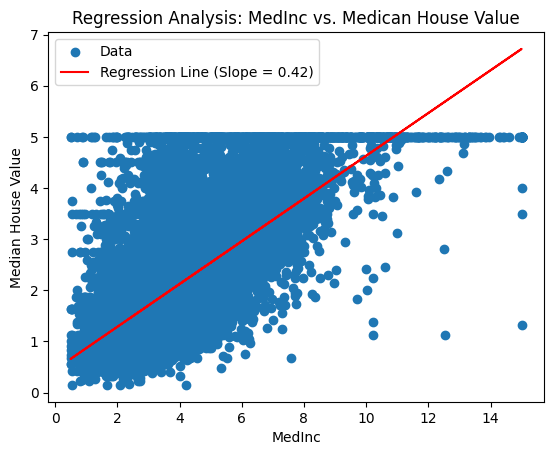

In [23]:
# Plot the scatterplot with regression line
plt.scatter(df['MedInc'], target, label = 'Data')
plt.plot(df['MedInc'], y_pred, color ='red', label=f'Regression Line (Slope = {slope:.2f})')
plt.title('Regression Analysis: MedInc vs. Medican House Value')
plt.xlabel('MedInc')
plt.ylabel('Median House Value')
plt.legend()
plt.show()